In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df_corr = df[['price', 'area', 'bedrooms', 'bathrooms']].corr()
df_corr

,price,area,bedrooms,bathrooms
price,1.000000,0.535997,0.366494,0.517545
area,0.535997,1.000000,0.151858,0.193820
bedrooms,0.366494,0.151858,1.000000,0.373930
bathrooms,0.517545,0.193820,0.373930,1.000000


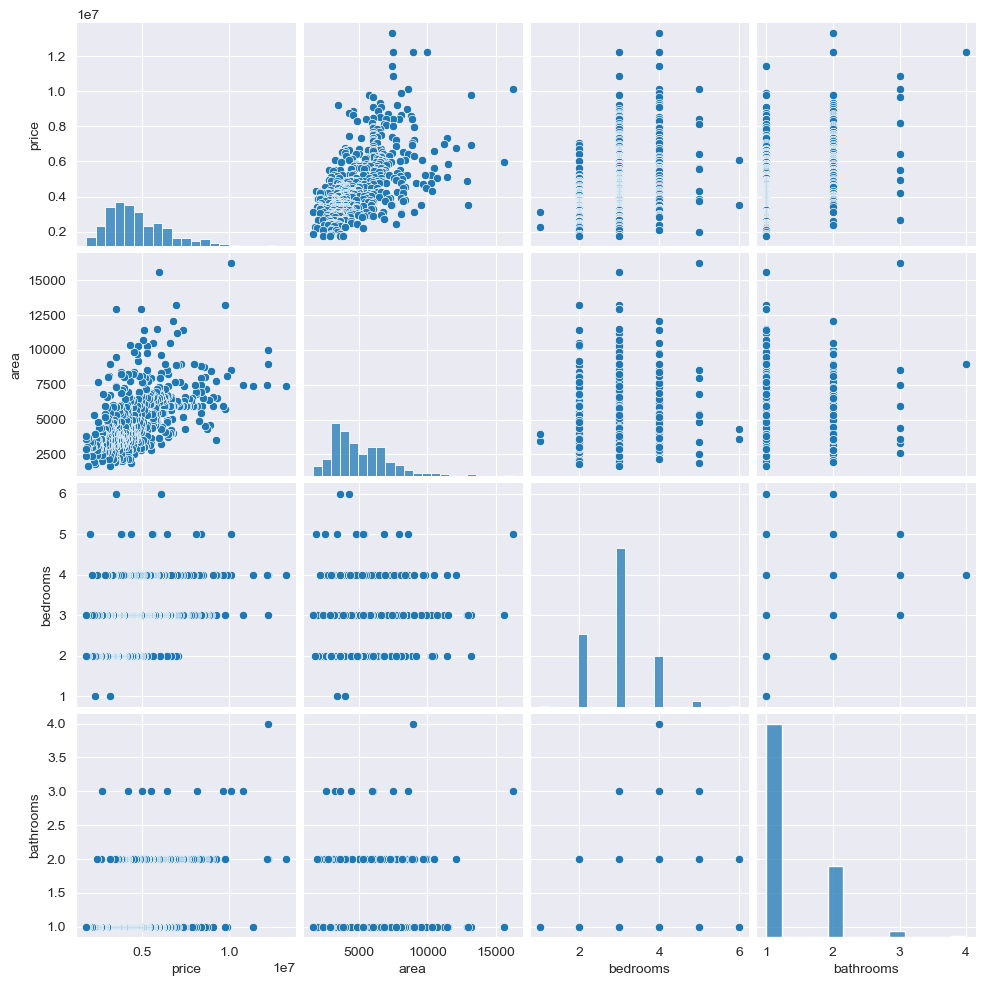

In [5]:
import warnings
# Suppress the FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_style('darkgrid')
sns.pairplot(df, vars=['price', 'area', 'bedrooms',	'bathrooms'])
plt.show()

## Linear regression

$$h(\overrightarrow{x}) = \overrightarrow{w} * \overrightarrow{x}$$

In [6]:
def hypothesis(X, w):
    return np.dot(X, w)

In [7]:
def compute_cost(X, y, w):
    m = len(y)
    h = hypothesis(X, w)
    cost = (1/(2*m)) * np.sum((h - y)**2)
    return cost

In [8]:
def gradient_descent_step(X, y, w, learning_rate = 0.001):
    m = len(y)
    h = hypothesis(X, w)
    gradient = np.dot(X.T, (h - y)) / m
    w -= learning_rate * gradient
    return w

In [9]:
def gradient_descent(X, y, w, num_iterations, learning_rate = 0.001):
    m = len(y)
    cost_history = np.zeros(num_iterations)
    
    for i in range(num_iterations):
        w = gradient_descent_step(X, y, w, learning_rate)
        cost_history[i] = compute_cost(X, y, w)
    
    return w, cost_history

In [10]:
X = df.iloc[:,[1, 2 ,3]]

In [11]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X_scaled = scaler_x.fit_transform(X)
X_scaled = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])
X_scaled

array([[ 1.        ,  1.04672629,  1.40341936,  1.42181174],
       [ 1.        ,  1.75700953,  1.40341936,  5.40580863],
       [ 1.        ,  2.21823241,  0.04727831,  1.42181174],
       ...,
       [ 1.        , -0.70592066, -1.30886273, -0.57018671],
       [ 1.        , -1.03338891,  0.04727831, -0.57018671],
       [ 1.        , -0.5998394 ,  0.04727831, -0.57018671]])

In [12]:
y = df.iloc[:, 0].values
y = y.reshape(-1, 1)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)
y_scaled[:6]

array([[4.56636513],
       [4.00448405],
       [4.00448405],
       [3.98575468],
       [3.55497918],
       [3.25530927]])

In [14]:
w = np.zeros((X_scaled.shape[1], 1))

In [15]:
w, history = gradient_descent(X_scaled, y_scaled, w, 1000, learning_rate = 0.001)

In [16]:
w

array([[1.62657248e-16],
       [3.04051374e-01],
       [1.67117016e-01],
       [2.73231425e-01]])

In [17]:
history

array([0.49931104, 0.49862406, 0.49793908, 0.49725608, 0.49657506,
       0.495896  , 0.49521892, 0.49454379, 0.49387061, 0.49319939,
       0.4925301 , 0.49186275, 0.49119733, 0.49053384, 0.48987227,
       0.48921261, 0.48855486, 0.48789901, 0.48724505, 0.48659299,
       0.48594282, 0.48529452, 0.4846481 , 0.48400355, 0.48336087,
       0.48272004, 0.48208106, 0.48144394, 0.48080865, 0.4801752 ,
       0.47954358, 0.47891379, 0.47828582, 0.47765966, 0.47703532,
       0.47641278, 0.47579203, 0.47517309, 0.47455593, 0.47394055,
       0.47332695, 0.47271513, 0.47210507, 0.47149678, 0.47089024,
       0.47028546, 0.46968242, 0.46908113, 0.46848157, 0.46788375,
       0.46728765, 0.46669327, 0.46610061, 0.46550967, 0.46492043,
       0.46433289, 0.46374704, 0.46316289, 0.46258043, 0.46199965,
       0.46142054, 0.46084311, 0.46026734, 0.45969324, 0.4591208 ,
       0.45855   , 0.45798086, 0.45741335, 0.45684749, 0.45628326,
       0.45572066, 0.45515968, 0.45460032, 0.45404257, 0.45348

## Scikit-learn Linear Regression

In [18]:
from sklearn import linear_model

In [19]:
model = linear_model.LinearRegression()

In [29]:
X.shape

(545, 3)

In [42]:
Y = y_scaled
Y.shape

(545, 1)

In [43]:
model.fit(X, Y)

LinearRegression()

In [44]:
model.coef_

array([[2.02685357e-04, 2.17699505e-01, 7.41709512e-01]])

In [45]:
model.intercept_

array([-2.64346364])

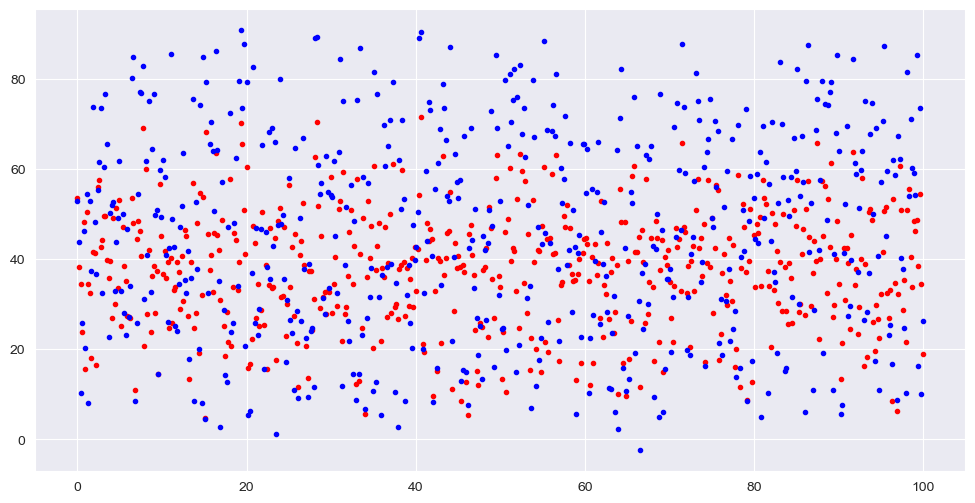

In [46]:
plt.figure(figsize=(12, 6))
x_axis = np.linspace(0, 100, 545)
x_matrix = np.random.rand(545, 3) * 100  # Генеруємо випадкові значення для площі, кількості ванних кімнат та кількості спалень
x_matrix = np.hstack((np.ones((545, 1)), x_matrix))
model_cof = []
model_cof.append(model.intercept_[0])
for i in model.coef_[0]:
    model_cof.append(i)
plt.plot(x_axis, hypothesis(x_matrix, w), 'r.')
plt.plot(x_axis, hypothesis(x_matrix, model_cof), 'b.')

In [27]:
y_pred = model.predict(X)
y_pred

array([[ 1.21467875],
       [ 3.01023322],
       [ 1.51180005],
       [ 1.23089358],
       [ 0.47296924],
       [ 1.75490359],
       [ 2.19150328],
       [ 3.9536652 ],
       [ 0.61079528],
       [ 0.6584947 ],
       [ 1.4267911 ],
       [ 1.66857505],
       [ 1.03834249],
       [ 0.42015215],
       [ 1.07399968],
       [ 0.18515603],
       [ 1.04847676],
       [ 1.21587943],
       [ 0.42540654],
       [ 0.79429389],
       [-0.37305487],
       [ 0.94326762],
       [ 0.38296151],
       [ 0.41729912],
       [ 1.27668504],
       [ 1.03631563],
       [ 0.70916604],
       [ 0.55017693],
       [ 1.53980149],
       [ 0.82552286],
       [ 1.00812694],
       [ 0.17014188],
       [ 0.69985794],
       [ 1.44276814],
       [ 0.57311123],
       [ 0.91185139],
       [ 1.00954574],
       [ 1.53492161],
       [-0.03254348],
       [ 0.92686554],
       [ 0.07893347],
       [ 0.78213277],
       [ 0.80645501],
       [ 0.92686554],
       [ 0.92686554],
       [ 0

In [28]:
x_matrix

array([[ 1.        ,  6.88700712, 48.51247082, 21.65074311],
       [ 1.        , 57.10764312,  0.1169273 , 29.03950941],
       [ 1.        , 25.54678079, 19.25990689, 69.90227025],
       ...,
       [ 1.        , 96.41165501, 37.60440975, 15.69505171],
       [ 1.        , 50.74212801, 42.16250122, 84.49231578],
       [ 1.        , 51.95006781, 96.7424463 , 71.72385647]])